<a href="https://colab.research.google.com/github/GomezIker/master-IA-ejercicios/blob/main/actividad_3_Aprendizaje_automatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("creditcardcsvpresent.csv")

In [ ]:
# Transaction Date se puede borrar, que son todos nulos
data = data.drop(columns=["Transaction date",'Merchant_id'])

In [ ]:
data.replace({'Y':'1', 'N':'0'},inplace=True)
data["Is declined"] = data["Is declined"].astype(int)
data["isForeignTransaction"] = data["isForeignTransaction"].astype(int)
data["isHighRiskCountry"] = data["isHighRiskCountry"].astype(int)
data["isFradulent"] = data["isFradulent"].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Average Amount/transaction/day  3075 non-null   float64
 1   Transaction_amount              3075 non-null   float64
 2   Is declined                     3075 non-null   int64  
 3   Total Number of declines/day    3075 non-null   int64  
 4   isForeignTransaction            3075 non-null   int64  
 5   isHighRiskCountry               3075 non-null   int64  
 6   Daily_chargeback_avg_amt        3075 non-null   int64  
 7   6_month_avg_chbk_amt            3075 non-null   float64
 8   6-month_chbk_freq               3075 non-null   int64  
 9   isFradulent                     3075 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 240.4 KB


In [ ]:
data.head()

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,100.0,3000.0,0,5,1,1,0,0.0,0,1
1,100.0,4300.0,0,5,1,1,0,0.0,0,1
2,185.5,4823.0,1,5,0,0,0,0.0,0,1
3,185.5,5008.5,1,8,0,0,0,0.0,0,1
4,500.0,26000.0,0,0,1,1,800,677.2,6,1


In [ ]:
data.isnull().sum()

Average Amount/transaction/day    0
Transaction_amount                0
Is declined                       0
Total Number of declines/day      0
isForeignTransaction              0
isHighRiskCountry                 0
Daily_chargeback_avg_amt          0
6_month_avg_chbk_amt              0
6-month_chbk_freq                 0
isFradulent                       0
dtype: int64

In [ ]:
data.shape

(3075, 10)

In [ ]:
data.describe(include='all')

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
count,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,515.026556,9876.399210,0.018537,0.957398,0.229593,0.066667,55.737561,40.022407,0.391870,0.145691
std,291.906978,10135.331016,0.134903,2.192391,0.420640,0.249484,206.634779,155.968840,1.548479,0.352854
min,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2000.000000,108000.000000,1.000000,20.000000,1.000000,1.000000,998.000000,998.000000,9.000000,1.000000


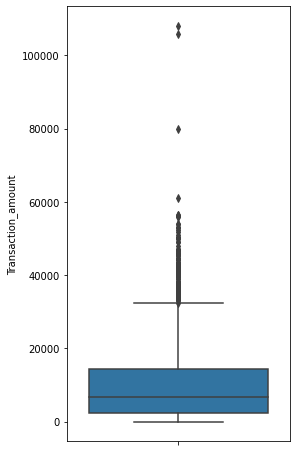

In [ ]:
plt.figure(figsize=(4,8))
sns.boxplot(y = data['Transaction_amount'])

In [ ]:
correlation = data.corr()

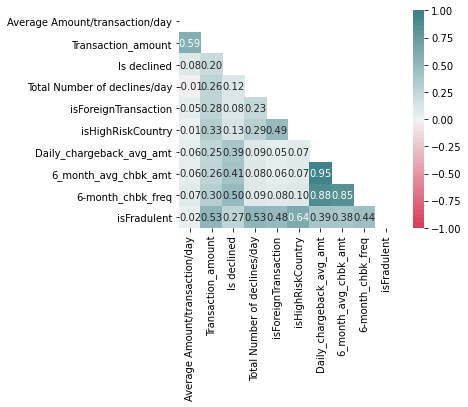

In [ ]:
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation, 
            annot=True,
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(5,200,n=100),
            square=True,
            fmt=".2f",
            mask=mask)

In [ ]:
pairs=correlation.unstack()
sorted_pairs= pairs.sort_values()
positive_corr=sorted_pairs[sorted_pairs.between(0.50,1,inclusive=False)]
index=np.arange(0,len(positive_corr),2)
positive_corr[index]

isFradulent                     Transaction_amount              0.528913
                                Total Number of declines/day    0.531990
Average Amount/transaction/day  Transaction_amount              0.587111
isFradulent                     isHighRiskCountry               0.639792
6_month_avg_chbk_amt            6-month_chbk_freq               0.851339
6-month_chbk_freq               Daily_chargeback_avg_amt        0.884611
6_month_avg_chbk_amt            Daily_chargeback_avg_amt        0.953663
dtype: float64

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [ ]:
kmeans = KMeans(n_clusters=3).fit(data)
centroids = kmeans.cluster_centers_

In [ ]:
print(centroids)

[[7.00174972e+02 1.75071163e+04 3.15126050e-02 1.22794118e+00
  2.75210084e-01 8.82352941e-02 8.78760504e+01 6.38938025e+01
  6.12394958e-01 2.22689076e-01]
 [4.02153583e+02 4.03821498e+03 6.04838710e-03 6.62298387e-01
  1.69858871e-01 2.67137097e-02 2.77888105e+01 1.85146169e+01
  1.69858871e-01 5.14112903e-02]
 [8.58038700e+02 4.09448511e+04 1.07913669e-01 3.31654676e+00
  7.69784173e-01 4.89208633e-01 2.34546763e+02 1.83517986e+02
  2.05035971e+00 9.64028777e-01]]


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


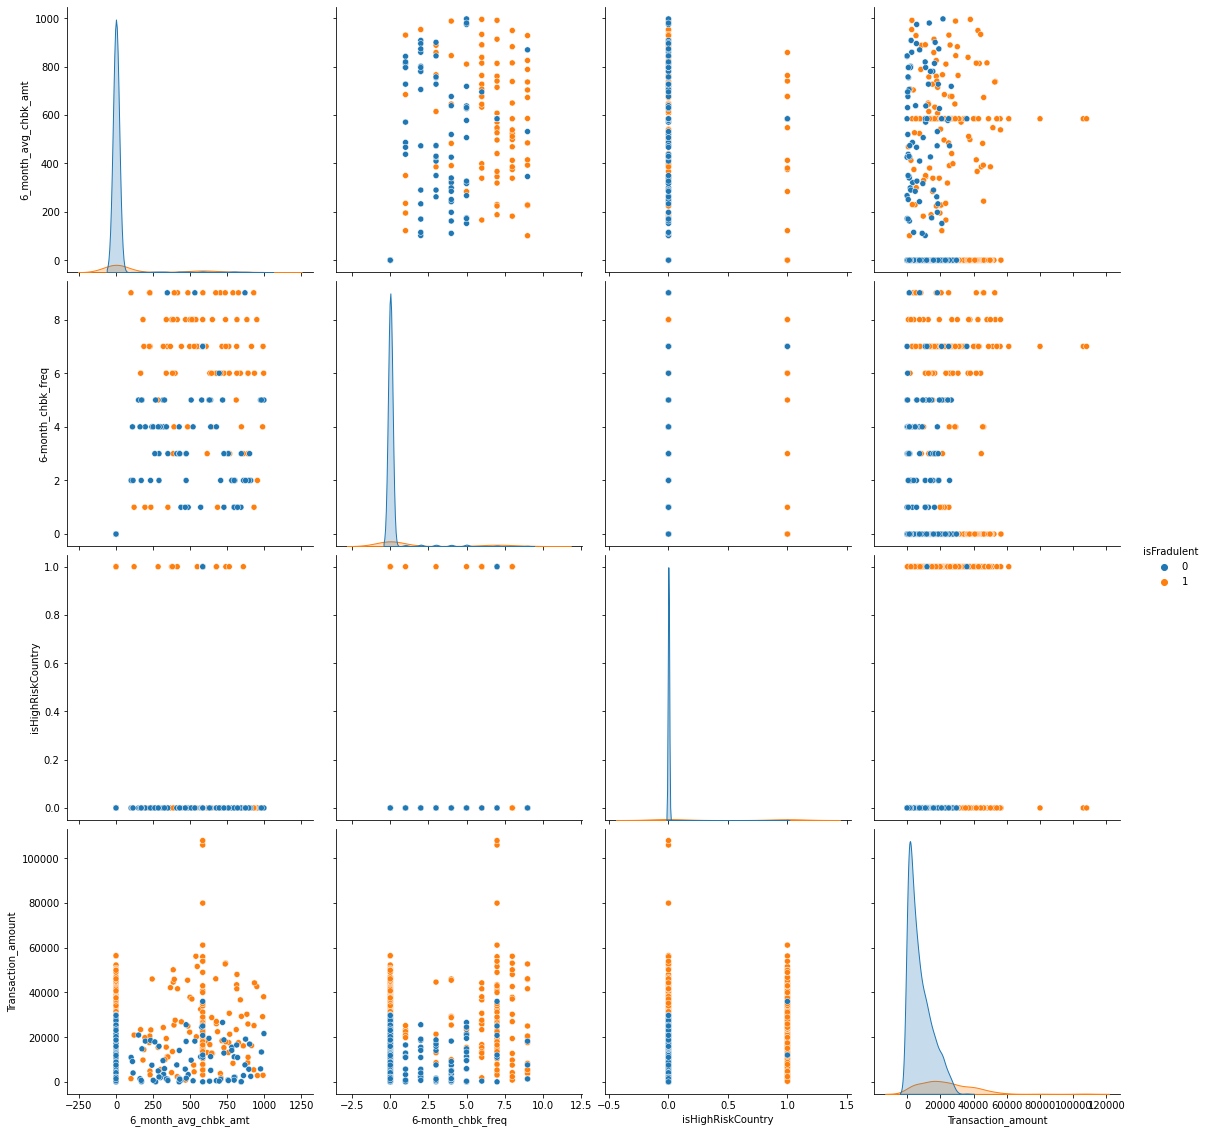

In [ ]:
sns.pairplot(data,
             hue="isFradulent",
             size=4,
             vars=["6_month_avg_chbk_amt","6-month_chbk_freq","isHighRiskCountry","Transaction_amount"],
             kind='scatter')